## Figure 6 (Journal of Climate submission; Molina et al.)

Fig. 6. Annual cycle of area weighted averages of monthly SSTs ($^{\circ}$C) across the same regions indicated in Fig. 5. The CESM1 control (800-year mean), OISST (1982-2020 mean), Global and Pacific experiments (300-year mean), Pacific Salt experiment (150-year mean), and present day observations (OISST; 40-year mean) are indicated in the legend.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from climatico.util import weighted_mean, pacific_lon
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
#list of filenames to do this for

file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'
obs_oissts = '/gpfs/fs1/collections/rda/data/ds277.7/avhrr_v2.1/*/oisst-avhrr-v02r01.*.nc'

In [4]:
def grab_weighted_avg(ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst = None, obs = False,
                      lon1 = 170.5, lon2 = -150.5, lat1 = 30.5, lat2 = 40.5):
    """
    Region to take weighted mean for.
    """
    if obs == False:
        try:
            assert ds_oisst == None
            print("passed, no ds_oisst")
        except ValueError:
            print("ds_oisst not None, set obs to True")

    if obs == True:
        try:
            assert ds_oisst == None
            print("please insert ds_oisst")
        except ValueError:
            print("passed, ds_oisst data input")
    
    ds_cntrl_box = weighted_mean(ds_cntrl.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_g02sv_box = weighted_mean(ds_g02sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_g04sv_box = weighted_mean(ds_g04sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_p02sv_box = weighted_mean(ds_p02sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_p04sv_box = weighted_mean(ds_p04sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_psalt_box = weighted_mean(ds_psalt.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')
    
    if obs:
        
        ds_oisst_box = weighted_mean(ds_oisst.sel(
            lon=slice(pacific_lon(lon1, to180=False),
                      pacific_lon(lon2, to180=False)), 
            lat=slice(lat1,lat2)), 
                      lat_name='lat')

    if not obs:
        return ds_cntrl_box.values, ds_g02sv_box.values, ds_g04sv_box.values, ds_p02sv_box.values, ds_p04sv_box.values, ds_psalt_box.values
    
    if obs:
        return ds_cntrl_box.values, ds_g02sv_box.values, ds_g04sv_box.values, ds_p02sv_box.values, ds_p04sv_box.values, ds_psalt_box.values, ds_oisst_box.values

In [5]:
%%capture

ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
lat = ds_g02sv['lat'].values
lon = ds_g02sv['lon'].values
ds_g02sv = ds_g02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).groupby('time.month').mean(skipna=True)

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).groupby('time.month').mean(skipna=True)

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).groupby('time.month').mean(skipna=True)

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).groupby('time.month').mean(skipna=True)

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).groupby('time.month').mean(skipna=True)

In [6]:
%%capture

ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).groupby('time.month').mean(skipna=True)

In [7]:
%%capture

ds_oisst = xr.open_mfdataset(f'{obs_oissts}', combine='by_coords')
ds_oisst = ds_oisst.isel(zlev=0)['sst'].sel(time=slice('1982-01-01','2020-12-31')).resample(time='MS').mean(
    skipna=True).groupby('time.month').mean(skipna=True)

In [8]:
%%capture

# north pacific
ds_cntrl_box1_, ds_g02sv_box1_, ds_g04sv_box1_, ds_p02sv_box1_, ds_p04sv_box1_, ds_psalt_box1_, ds_oisst_box1_ = grab_weighted_avg(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = 170.5, lon2 = -150.5, lat1 = 30.5, lat2 = 40.5)

# north atlantic
ds_cntrl_box2_, ds_g02sv_box2_, ds_g04sv_box2_, ds_p02sv_box2_, ds_p04sv_box2_, ds_psalt_box2_, ds_oisst_box2_ = grab_weighted_avg(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -50.5, lon2 = -20.5, lat1 = 30.5, lat2 = 40.5)

# equatorial pacific
ds_cntrl_box3_, ds_g02sv_box3_, ds_g04sv_box3_, ds_p02sv_box3_, ds_p04sv_box3_, ds_psalt_box3_, ds_oisst_box3_ = grab_weighted_avg(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -170.5, lon2 = -120.5, lat1 = -10.5, lat2 = 10.5)

# south pacific
ds_cntrl_box4_, ds_g02sv_box4_, ds_g04sv_box4_, ds_p02sv_box4_, ds_p04sv_box4_, ds_psalt_box4_, ds_oisst_box4_ = grab_weighted_avg(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -160.5, lon2 = -110.5, lat1 = -40.5, lat2 = -30.5)

# south atlantic
ds_cntrl_box5_, ds_g02sv_box5_, ds_g04sv_box5_, ds_p02sv_box5_, ds_p04sv_box5_, ds_psalt_box5_, ds_oisst_box5_ = grab_weighted_avg(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -30.5, lon2 = -0.5, lat1 = -40.5, lat2 = -30.5)

# equatorial atlantic
ds_cntrl_box6_, ds_g02sv_box6_, ds_g04sv_box6_, ds_p02sv_box6_, ds_p04sv_box6_, ds_psalt_box6_, ds_oisst_box6_ = grab_weighted_avg(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -20.5, lon2 = -0.5, lat1 = -3.5, lat2 = 3.5)

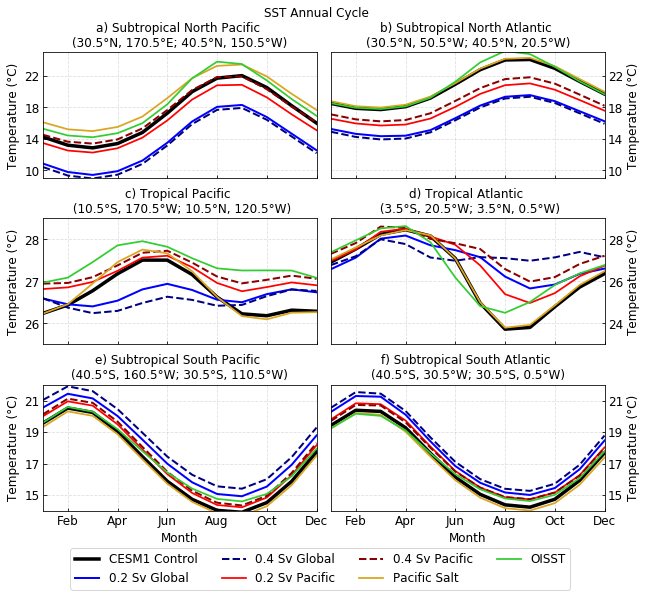

In [10]:
# -------------- create figure

a = u"\u00b0"
vanom1=-10
vanom2=10

fig = plt.figure(figsize=(8,7))

fig.suptitle('SST Annual Cycle', fontsize=12, x=0.475, y=1.0)

# --------------

ax1 = plt.axes([0., 0.66, 0.475, 0.25])
ax1.set_title(f'a) Subtropical North Pacific \n(30.5'+a+'N, 170.5'+a+'E; 40.5'+a+'N, 150.5'+a+'W)', fontsize=12)

ax1.plot(np.arange(0,12), ds_cntrl_box1_, c='k', lw=3.5)
ax1.plot(np.arange(0,12), ds_g02sv_box1_, c='b', lw=2)
ax1.plot(np.arange(0,12), ds_g04sv_box1_, c='navy', ls='--', lw=2)
ax1.plot(np.arange(0,12), ds_p02sv_box1_, c='red', ls='-', lw=1.75)
ax1.plot(np.arange(0,12), ds_p04sv_box1_, c='darkred', ls='--', lw=2)
ax1.plot(np.arange(0,12), ds_psalt_box1_, c='goldenrod', ls='-', lw=1.75)

ax1.plot(np.arange(0,12), ds_oisst_box1_, c='limegreen', ls='-', lw=1.75)

ax1.margins(x=0)
ax1.set_ylim([9.,25])
ax1.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax1.set_xticks([1,3,5,7,9,11])
#ax1.set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'], fontsize=12)
ax1.set_yticks([10,14,18,22])
ax1.set_yticklabels([10,14,18,22], fontsize=12)
#ax1.set_xlabel('Month', fontsize=12)
ax1.grid(alpha=0.4, ls='--')
ax1.set_ylabel('Temperature ('+a+'C)', fontsize=12)


# --------------

ax2 = plt.axes([0.5, 0.66, 0.475, 0.25])
ax2.set_title('b) Subtropical North Atlantic \n(30.5'+a+'N, 50.5'+a+'W; 40.5'+a+'N, 20.5'+a+'W)', fontsize=12)

ax2.plot(np.arange(0,12), ds_cntrl_box2_, c='k', lw=3.5)
ax2.plot(np.arange(0,12), ds_g02sv_box2_, c='b', lw=2)
ax2.plot(np.arange(0,12), ds_g04sv_box2_, c='navy', ls='--', lw=2)
ax2.plot(np.arange(0,12), ds_p02sv_box2_, c='red', ls='-', lw=1.75)
ax2.plot(np.arange(0,12), ds_p04sv_box2_, c='darkred', ls='--', lw=2)
ax2.plot(np.arange(0,12), ds_psalt_box2_, c='goldenrod', ls='-', lw=1.75)

ax2.plot(np.arange(0,12), ds_oisst_box2_, c='limegreen', ls='-', lw=1.75)

ax2.margins(x=0)
ax2.set_ylim([9.,25])
ax2.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax2.set_xticks([1,3,5,7,9,11])
#ax2.set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'], fontsize=12)
ax2.set_yticks([10,14,18,22])
ax2.set_yticklabels([10,14,18,22], fontsize=12)
#ax2.set_xlabel('Month', fontsize=12)
ax2.grid(alpha=0.4, ls='--')
ax2.set_ylabel('Temperature ('+a+'C)', fontsize=12)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

# --------------

ax3 = plt.axes([0., 0.33, 0.475, 0.25])
ax3.set_title('c) Tropical Pacific \n (10.5'+a+'S, 170.5'+a+'W; 10.5'+a+'N, 120.5'+a+'W)', fontsize=12)

ax3.plot(np.arange(0,12), ds_cntrl_box3_, c='k', lw=3.5)
ax3.plot(np.arange(0,12), ds_g02sv_box3_, c='b', lw=2)
ax3.plot(np.arange(0,12), ds_g04sv_box3_, c='navy', ls='--', lw=2)
ax3.plot(np.arange(0,12), ds_p02sv_box3_, c='red', ls='-', lw=1.75)
ax3.plot(np.arange(0,12), ds_p04sv_box3_, c='darkred', ls='--', lw=2)
ax3.plot(np.arange(0,12), ds_psalt_box3_, c='goldenrod', ls='-', lw=1.75)

ax3.plot(np.arange(0,12), ds_oisst_box3_, c='limegreen', ls='-', lw=1.75)

ax3.margins(x=0)
ax3.set_ylim([25.5,28.5])
ax3.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax3.set_xticks([1,3,5,7,9,11])
#ax3.set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'], fontsize=12)
ax3.set_yticks([26,27,28])
ax3.set_yticklabels([26,27,28], fontsize=12)
#ax3.set_xlabel('Month', fontsize=12)
ax3.grid(alpha=0.4, ls='--')
ax3.set_ylabel('Temperature ('+a+'C)', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0.33, 0.475, 0.25])
ax4.set_title('d) Tropical Atlantic \n (3.5'+a+'S, 20.5'+a+'W; 3.5'+a+'N, 0.5'+a+'W)', fontsize=12)

ax4.plot(np.arange(0,12), ds_cntrl_box6_, c='k', lw=3.5)
ax4.plot(np.arange(0,12), ds_g02sv_box6_, c='b', lw=2)
ax4.plot(np.arange(0,12), ds_g04sv_box6_, c='navy', ls='--', lw=2)
ax4.plot(np.arange(0,12), ds_p02sv_box6_, c='red', ls='-', lw=1.75)
ax4.plot(np.arange(0,12), ds_p04sv_box6_, c='darkred', ls='--', lw=2)
ax4.plot(np.arange(0,12), ds_psalt_box6_, c='goldenrod', ls='-', lw=1.75)

ax4.plot(np.arange(0,12), ds_oisst_box6_, c='limegreen', ls='-', lw=1.75)

ax4.margins(x=0)
ax4.set_ylim([23.,29.])
ax4.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax4.set_xticks([1,3,5,7,9,11])
#ax4.set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'], fontsize=12)
ax4.set_yticks([24,26,28])
ax4.set_yticklabels([24,26,28], fontsize=12)
#ax4.set_xlabel('Month', fontsize=12)
ax4.grid(alpha=0.4, ls='--')
ax4.set_ylabel('Temperature ('+a+'C)', fontsize=12)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()

# --------------

ax5 = plt.axes([0., 0., 0.475, 0.25])
ax5.set_title('e) Subtropical South Pacific \n(40.5'+a+'S, 160.5'+a+'W; 30.5'+a+'S, 110.5'+a+'W)', fontsize=12)

ax5.plot(np.arange(0,12), ds_cntrl_box4_, c='k', lw=3.5)
ax5.plot(np.arange(0,12), ds_g02sv_box4_, c='b', lw=2)
ax5.plot(np.arange(0,12), ds_g04sv_box4_, c='navy', ls='--', lw=2)
ax5.plot(np.arange(0,12), ds_p02sv_box4_, c='red', ls='-', lw=1.75)
ax5.plot(np.arange(0,12), ds_p04sv_box4_, c='darkred', ls='--', lw=2)
ax5.plot(np.arange(0,12), ds_psalt_box4_, c='goldenrod', ls='-', lw=1.75)

ax5.plot(np.arange(0,12), ds_oisst_box4_, c='limegreen', ls='-', lw=1.75)

ax5.margins(x=0)
ax5.set_ylim([14.,22.])
ax5.tick_params(axis='both', labelleft=True, direction='in', labelbottom=True)
ax5.set_xticks([1,3,5,7,9,11])
ax5.set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'], fontsize=12)
ax5.set_yticks([15,17,19,21])
ax5.set_yticklabels([15,17,19,21], fontsize=12)
ax5.set_xlabel('Month', fontsize=12)
ax5.grid(alpha=0.4, ls='--')
ax5.set_ylabel('Temperature ('+a+'C)', fontsize=12)

# --------------

ax6 = plt.axes([0.5, 0., 0.475, 0.25])
ax6.set_title('f) Subtropical South Atlantic \n(40.5'+a+'S, 30.5'+a+'W; 30.5'+a+'S, 0.5'+a+'W)', fontsize=12)

l1, = ax6.plot(np.arange(0,12), ds_cntrl_box5_, c='k', lw=3.5)
l2, = ax6.plot(np.arange(0,12), ds_g02sv_box5_, c='b', lw=2)
l3, = ax6.plot(np.arange(0,12), ds_g04sv_box5_, c='navy', ls='--', lw=2)
l4, = ax6.plot(np.arange(0,12), ds_p02sv_box5_, c='red', ls='-', lw=1.75)
l5, = ax6.plot(np.arange(0,12), ds_p04sv_box5_, c='darkred', ls='--', lw=2)
l6, = ax6.plot(np.arange(0,12), ds_psalt_box5_, c='goldenrod', ls='-', lw=1.75)

l0, = ax6.plot(np.arange(0,12), ds_oisst_box5_, c='limegreen', ls='-', lw=1.75)

ax6.margins(x=0)
ax6.set_ylim([14.,22.])
ax6.tick_params(axis='both', labelleft=True, direction='in', labelbottom=True)
ax6.set_xticks([1,3,5,7,9,11])
ax6.set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'], fontsize=12)
ax6.set_yticks([15,17,19,21])
ax6.set_yticklabels([15,17,19,21], fontsize=12)
ax6.set_xlabel('Month', fontsize=12)
ax6.grid(alpha=0.4, ls='--')
ax6.set_ylabel('Temperature ('+a+'C)', fontsize=12)
ax6.yaxis.set_label_position("right")
ax6.yaxis.tick_right()

# --------------

ax5.legend([l1,
            l2,l3,l4,l5,l6,l0],
           ['CESM1 Control',
            '0.2 Sv Global','0.4 Sv Global','0.2 Sv Pacific','0.4 Sv Pacific','Pacific Salt','OISST'], 
           bbox_to_anchor=(1.95, -0.675), ncol=4, loc='lower right', fontsize=12)

plt.savefig(f'{directory_figs}amocenso_fig6.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig6.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------